In [1]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

__author__ = 'Song Huang'
__email__ = 'shuang89@ucsc.edu'
__version__ = '170503A'

from __future__ import (print_function, division, absolute_import)

import os
import copy
import time
import warnings
import subprocess

import numpy as np

# Matplotlib related
import matplotlib as mpl
import matplotlib.pyplot as plt
#mpl.style.use('classic')
plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

from astropy.io import fits
from astropy.table import \
    Table, \
    Column, \
    vstack
from astropy.utils.metadata import MergeConflictWarning
warnings.filterwarnings('ignore', category=MergeConflictWarning, 
                        append=True)
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.utils.console import ProgressBar

import hsc_massive
from hsc_massive import \
    s16a_path, \
    sample_selection, \
    plotting

#envir = s16a_path.set_env(version='astro4')
envir = s16a_path.set_env(version='kungpao')

ORG = plotting.ORG
BLK = plotting.BLK
BLU = plotting.BLU
GRN = plotting.GRN
PUR = plotting.PUR

# Notes about the four galaxies


1. SDSS J161738.78+423210.5 : spec-6035-56076-0453.fits  , z=0.441
    - http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?ra=244.41156&dec=42.53627
2. SDSS J162018.92+422705.9 : spec-0815-52374-0293.fits  , z=0.474
    - http://skyserver.sdss.org/dr13/en/tools/explore/summary.aspx?ra=245.07883382614017&dec=42.4516892941916
3. SDSS J222345.38+013747.6 : spec-4322-55503-0264.fits  , z=0.370
    - http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?id=1237678596469358913
4. SDSS J224041.20+005336.6 : spec-1037-52878-0576.fits  , z=0.362
    - http://skyserver.sdss.org/dr13/en/tools/explore/Summary.aspx?id=1237663480335499615

## Names of the SDSS files and their redshifts

In [55]:
sdss_1_name = r'$\mathrm{SDSS\ J1617+4232}$'
sdss_1 = os.path.join('sdss', 'spec-6035-56076-0453.fits')
sdss_1_z = 0.441 

sdss_2_name = r'$\mathrm{SDSS\ J1620+4227}$'
sdss_2 = os.path.join('sdss', 'spec-0815-52374-0293.fits')
sdss_2_z = 0.474 

sdss_3_name = r'$\mathrm{SDSS\ J2223+0137}$'
sdss_3 = os.path.join('sdss', 'spec-4322-55503-0264.fits')
sdss_3_z = 0.370 

sdss_4_name = r'$\mathrm{SDSS\ J2240+0053}$'
sdss_4 = os.path.join('sdss', 'spec-1037-52878-0576.fits')
sdss_4_z = 0.362 

## Load the SDSS spectra

In [56]:
sdss_1_spec = fits.open(sdss_1)[1].data
sdss_2_spec = fits.open(sdss_2)[1].data
sdss_3_spec = fits.open(sdss_3)[1].data
sdss_4_spec = fits.open(sdss_4)[1].data

In [65]:
sdss_1_logw = sdss_1_spec['loglam']
sdss_1_wave = 10.0 ** sdss_1_logw
sdss_1_flux = sdss_1_spec['flux']
sdss_1_ivar = sdss_1_spec['ivar']
sdss_1_model = sdss_1_spec['model']

sdss_2_logw = sdss_2_spec['loglam']
sdss_2_wave = 10.0 ** sdss_2_logw
sdss_2_flux = sdss_2_spec['flux']
sdss_2_ivar = sdss_2_spec['ivar']
sdss_2_model = sdss_2_spec['model']

sdss_3_logw = sdss_3_spec['loglam']
sdss_3_wave = 10.0 ** sdss_3_logw
sdss_3_flux = sdss_3_spec['flux']
sdss_3_ivar = sdss_3_spec['ivar']
sdss_3_model = sdss_3_spec['model']

sdss_4_logw = sdss_4_spec['loglam']
sdss_4_wave = 10.0 ** sdss_4_logw
sdss_4_flux = sdss_4_spec['flux']
sdss_4_ivar = sdss_4_spec['ivar']
sdss_4_model = sdss_4_spec['model']

## Plot the SDSS spectra

In [58]:
wave_label = r'$\mathrm{Wavelenght\ }(\AA)$'
flux_label = r'$\mathrm{Flux}\ (10^{-17}\ \mathrm{erg}/\mathrm{cm}^2/\mathrm{s}/\AA)$'

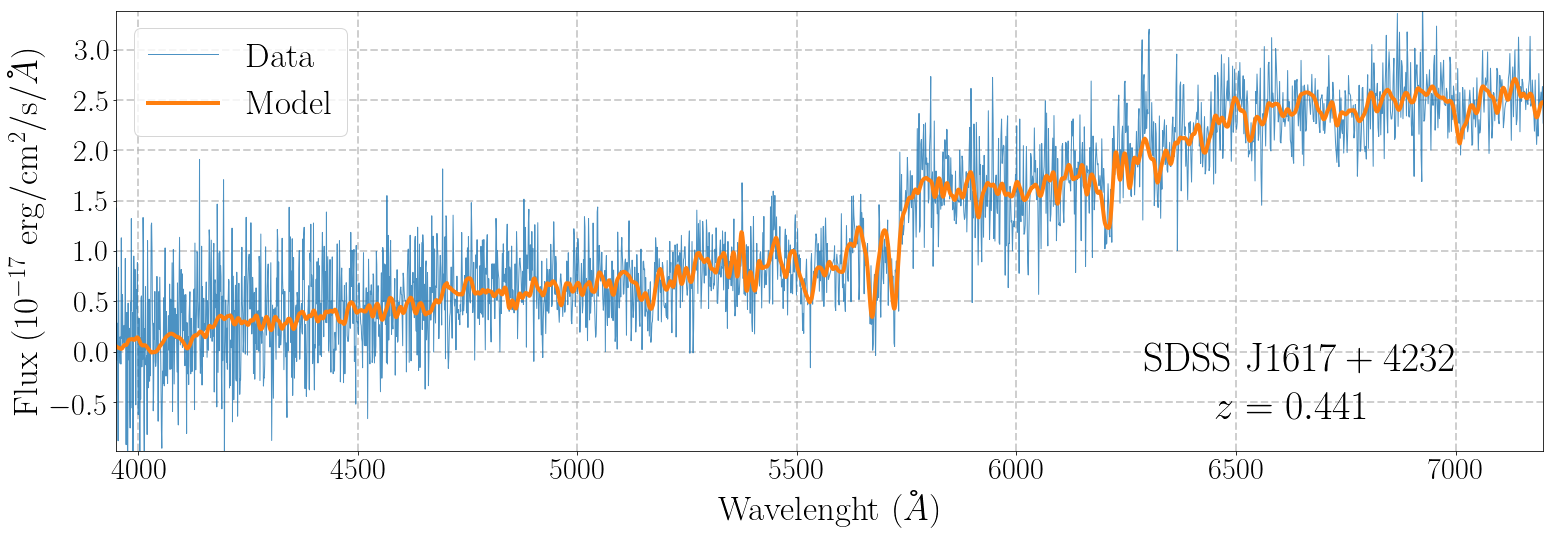

In [8]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(sdss_1_wave, sdss_1_flux, linewidth=1.0, label=r'$\mathrm{Data}$', 
         alpha=0.8)
ax1.plot(sdss_1_wave, sdss_1_model, linewidth=4.0, label=r'$\mathrm{Model}$')

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(3950.0, 7200.0)
ax1.set_ylim(-0.99, 3.39)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35)

ax1.text(0.72, 0.18, sdss_1_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_1_z, fontsize=40, 
         transform=ax1.transAxes)

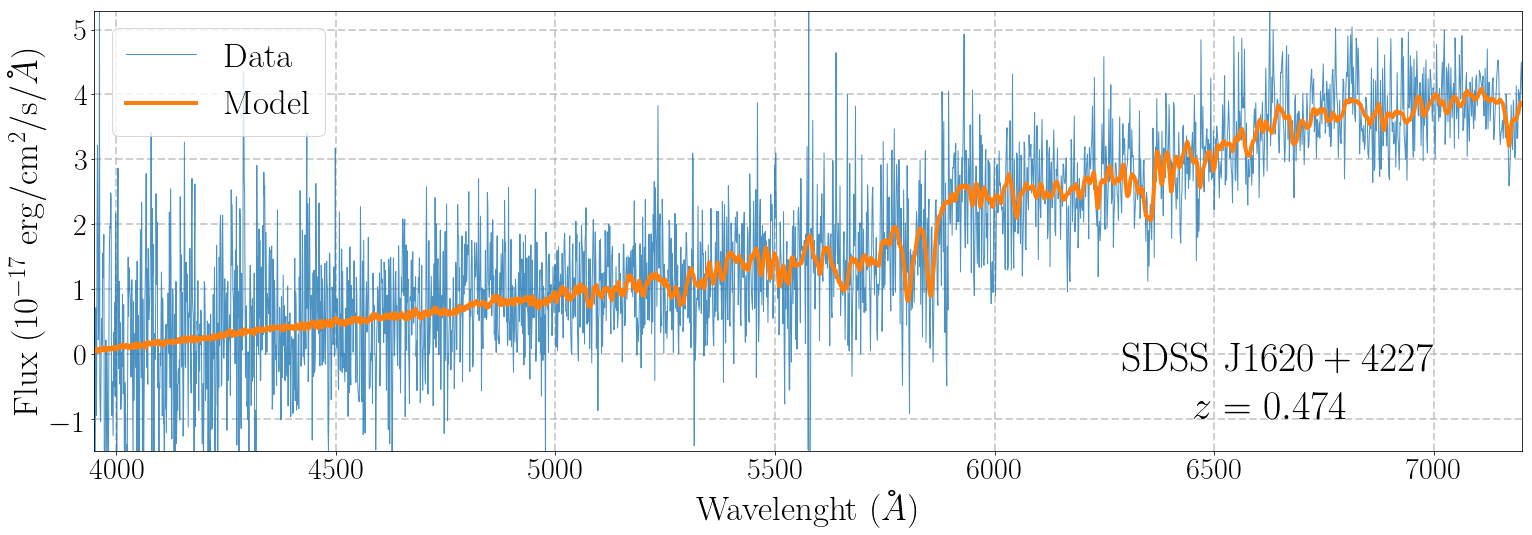

In [9]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(sdss_2_wave, sdss_2_flux, linewidth=1.0, label=r'$\mathrm{Data}$', 
         alpha=0.8)
ax1.plot(sdss_2_wave, sdss_2_model, linewidth=4.0, label=r'$\mathrm{Model}$')

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(3950.0, 7200.0)
ax1.set_ylim(-1.49, 5.29)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_2_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_2_z, fontsize=40, 
         transform=ax1.transAxes)

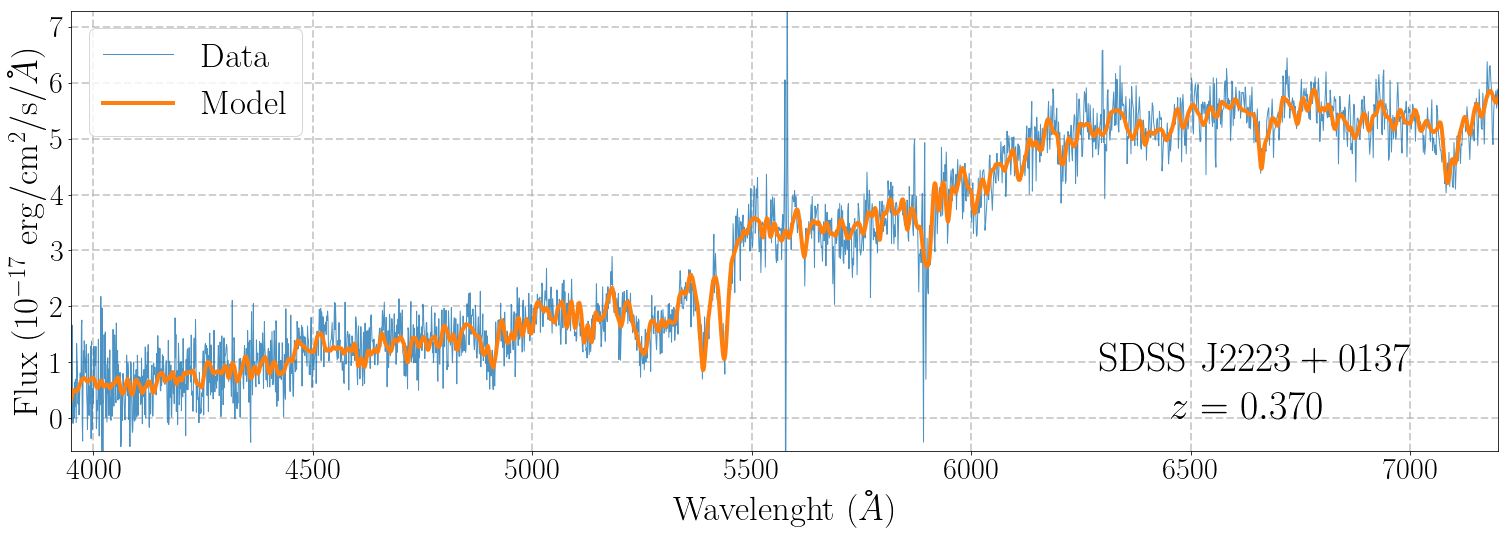

In [10]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(sdss_3_wave, sdss_3_flux, linewidth=1.0, label=r'$\mathrm{Data}$', 
         alpha=0.8)
ax1.plot(sdss_3_wave, sdss_3_model, linewidth=4.0, label=r'$\mathrm{Model}$')

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(3950.0, 7200.0)
ax1.set_ylim(-0.59, 7.29)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_3_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_3_z, fontsize=40, 
         transform=ax1.transAxes)

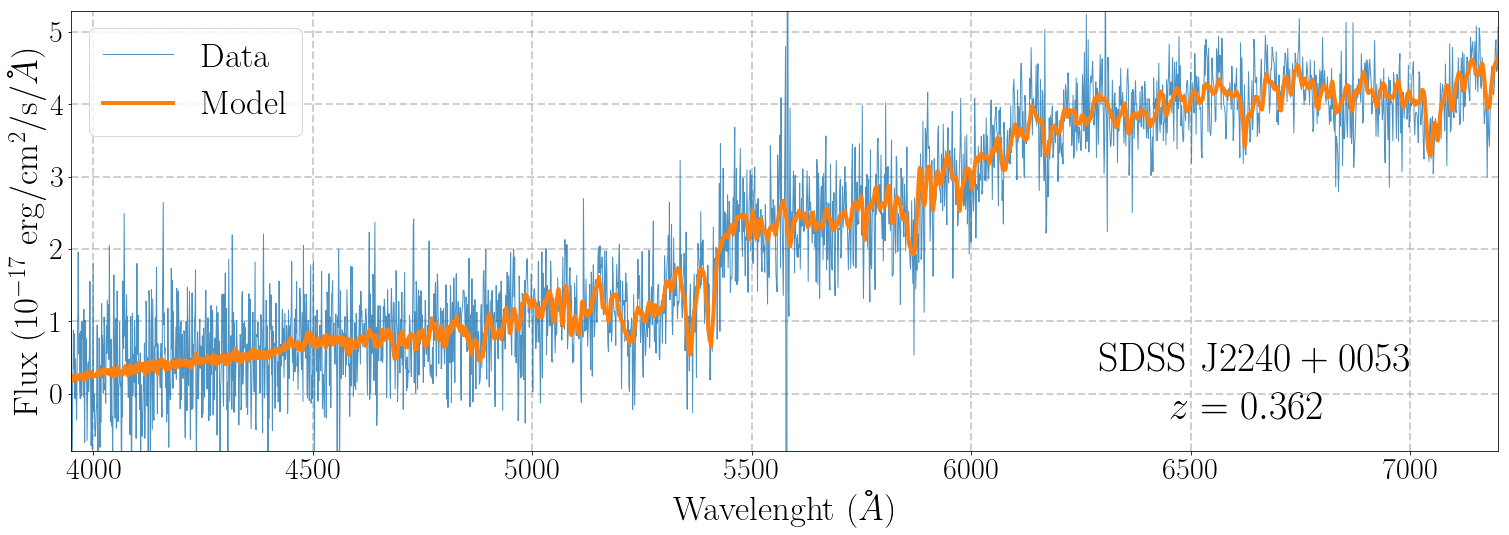

In [11]:
fig = plt.figure(figsize=(21, 7))
fig.subplots_adjust(left=0.05, right=0.994, 
                    bottom=0.12, top=0.994,
                    wspace=0.00, hspace=0.00)
# --------------------------------------------------------------------------------------- #
ax1 = fig.add_subplot(111)

ax1.plot(sdss_4_wave, sdss_4_flux, linewidth=1.0, label=r'$\mathrm{Data}$', 
         alpha=0.8)
ax1.plot(sdss_4_wave, sdss_4_model, linewidth=4.0, label=r'$\mathrm{Model}$')

# Only show the regions roughly overlap with KAST spectra
ax1.set_xlim(3950.0, 7200.0)
ax1.set_ylim(-0.79, 5.29)

ax1.grid(linestyle='--', linewidth=2.0, alpha=0.6)

for tick in ax1.xaxis.get_major_ticks():
    tick.label.set_fontsize(30) 
for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(30)

ax1.set_xlabel(wave_label, fontsize=35)
ax1.set_ylabel(flux_label, fontsize=35)

ax1.legend(fontsize=35, loc='upper left')

ax1.text(0.72, 0.18, sdss_4_name, fontsize=40, 
         transform=ax1.transAxes)
ax1.text(0.77, 0.07, r'$z=%6.3f$' % sdss_4_z, fontsize=40, 
         transform=ax1.transAxes)

## Estimate redshifts using SDSS spectrum

In [59]:
from redmonster.physics.zfinder import ZFinder
from redmonster.physics.zfitter import ZFitter
from redmonster.physics.zpicker2 import ZPicker

from desispec.interpolation import resample_flux

redtemp_dir = '/Users/song/Dropbox/work/code/redmonster/templates'

In [63]:
spec_type = set()
spec_type.add('GALAXY')

spec_templates = list()
spec_templates.append(('ndArch-ssp_em_galaxy-v000.fits', 0.0, 1.0, 0))
spec_templates.append(('ndArch-ssp_galaxy_cont-v002.fits', 0.0, 1.0, 0))
spec_templates.append(('ndArch-ssp_galaxy_emit-v002.fits', 0.0, 1.0, 0))
spec_templates.append(('ndArch-ssp_galaxy_noemit-v000.fits', 0.0, 1.0, 0))

dloglam = 1e-4

In [66]:
wave_mask, = np.where(sdss_1_wave > 4400.0)

sdss_1_flux_use = sdss_1_flux[wave_mask].reshape(1, wave_mask.shape[0])
sdss_1_wave_use = sdss_1_wave[wave_mask].reshape(wave_mask.shape[0])
sdss_1_logw_use = sdss_1_logw[wave_mask].reshape(wave_mask.shape[0])
sdss_1_ivar_use = sdss_1_ivar[wave_mask].reshape(wave_mask.shape[0])

In [79]:
#for template, zmin, zmax, group in spec_templates:
zfind = ZFinder(os.path.join(redtemp_dir, 'ndArch-ssp_em_galaxy-v000.fits'), 
                npoly=2, zmin=0.0, zmax=1.0, nproc=1, group=0)

zfind.zchi2(sdss_1_flux_use, sdss_1_logw_use, sdss_1_ivar_use, npixstep=2)

INFO fitted spectrum 1/1, chi2_null=13365.383790, 300 templates in /Users/song/Dropbox/work/code/redmonster/templates/ndArch-ssp_em_galaxy-v000.fits, npoly=2, using 1 procs in 41.744466 sec
INFO Not writing chi2


In [80]:
zfit = ZFitter(zfind.zchi2arr, zfind.zbase)
zfit.z_refine2()

In [81]:
zfit.z

array([[ 0.05244822,  0.60396886,  0.15239121,  0.68653567,  0.74180822]])

In [17]:
sdss_1_wave.shape[0]

4602